In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress, jarque_bera, kstest, shapiro

In [49]:
data = {
    "Год": list(range(2000, 2022)),
    "Инфляция (%)": [
        5.0, 6.5, 6.3, 6.2, 7.2, 6.8, 4.7, 4.8, 4.4, 3.0, 
        2.4, 2.6, 3.0, 4.0, 5.5, 6.0, 6.4, 7.2, 7.9, 8.4, 
        6.3, 5.1
    ],
    "Безработица (%)": [
        6.4, 5.8, 5.9, 5.9, 6.1, 7.2, 7.5, 7.4, 7.8, 10.1, 
        11.2, 11.0, 11.1, 10.2, 7.7, 6.8, 5.1, 4.2, 3.7, 3.4, 
        4.3, 4.1
    ]
}
df = pd.DataFrame(data)
df

,Год,Инфляция (%),Безработица (%)
0,2000,5.0,6.4
1,2001,6.5,5.8
2,2002,6.3,5.9
3,2003,6.2,5.9
4,2004,7.2,6.1
5,2005,6.8,7.2
6,2006,4.7,7.5
7,2007,4.8,7.4
8,2008,4.4,7.8
9,2009,3.0,10.1


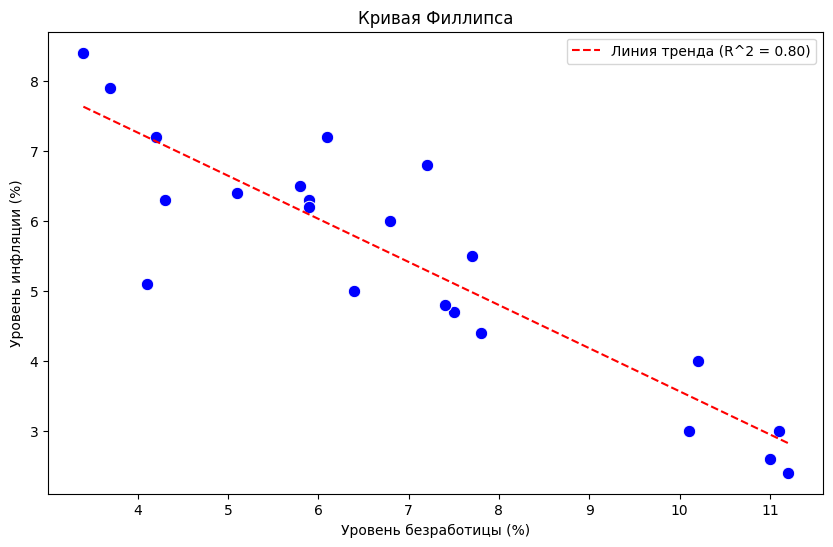

In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Безработица (%)", y="Инфляция (%)", data=df, color="blue", s=80)
plt.title("Кривая Филлипса")
plt.xlabel("Уровень безработицы (%)")
plt.ylabel("Уровень инфляции (%)")

slope, intercept, r_value, p_value, std_err = linregress(df["Безработица (%)"], df["Инфляция (%)"])
x_vals = np.linspace(df["Безработица (%)"].min(), df["Безработица (%)"].max(), 100)
y_vals = intercept + slope * x_vals

plt.plot(x_vals, y_vals, color="red", linestyle="--", label=f"Линия тренда (R^2 = {r_value**2:.2f})")
plt.legend()
plt.show()

In [51]:
model_params = {
    "slope": slope,
    "intercept": intercept,
    "R^2": r_value**2,
    "p_value": p_value,
    "std_err": std_err  
}
model_params

{'slope': np.float64(-0.6160913249149694),
 'intercept': np.float64(9.722743799068128),
 'R^2': np.float64(0.7969525560423927),
 'p_value': np.float64(2.3246274243011373e-08),
 'std_err': np.float64(0.06953646762501935)}

In [52]:
# Данные инфляции
inflation_data = df["Инфляция (%)"]

# Тест Джарка-Бера
jb_stat, jb_p_value = jarque_bera(inflation_data)

# Тест Колмогорова-Смирнова на нормальность
ks_stat, ks_p_value = kstest(inflation_data, 'norm', args=(inflation_data.mean(), inflation_data.std()))

# Тест Шапиро-Вилка
sw_stat, sw_p_value = shapiro(inflation_data)

# Результаты тестов
test_results = {
    "Model Parameters": model_params,
    "Jarque-Bera": {"statistic": jb_stat, "p_value": jb_p_value},
    "Kolmogorov-Smirnov": {"statistic": ks_stat, "p_value": ks_p_value},
    "Shapiro-Wilk": {"statistic": sw_stat, "p_value": sw_p_value}
}

test_results

{'Model Parameters': {'slope': np.float64(-0.6160913249149694),
  'intercept': np.float64(9.722743799068128),
  'R^2': np.float64(0.7969525560423927),
  'p_value': np.float64(2.3246274243011373e-08),
  'std_err': np.float64(0.06953646762501935)},
 'Jarque-Bera': {'statistic': np.float64(0.880328754958528),
  'p_value': np.float64(0.6439305647001305)},
 'Kolmogorov-Smirnov': {'statistic': np.float64(0.1286477347373075),
  'p_value': np.float64(0.8152620447027774)},
 'Shapiro-Wilk': {'statistic': np.float64(0.9610067195683363),
  'p_value': np.float64(0.5098964551059009)}}